# 2022-07-24
# 그리디 알고리듬 

In [15]:
import random 
from itertools import permutations 

alltours = permutations 

def distance_tour(atour) : return sum(distance_points(atour[i-1], atour[i]) for i in range(len(atour)))

acity = complex 

def distance_points(first, second) : return abs(first-second) # first 벡터와 second 벡터 사이 유클리드 거리 계산하는 함수 

def generate_cities(number_of_cities) : 
    seed = 10 
    width = 500
    height = 300 
    random.seed((number_of_cities, seed))

    return frozenset(
        # x 축에서 랜덤하게 좌표 생성
        acity(random.randint(1, width), 
        # y 축에서 랜덤하게 좌표 생성 
        random.randint(1, height)) 
        # 도시 수 만큼 반복해서 벡터 생성(중복 frozenset으로 제거)
        for c in range(number_of_cities))

import matplotlib.pyplot as plt 

def visualize_tour(tour) : 
    if len(tour) > 1000 : plt.figure(figsize=(15,10)) # 투어 크기 일정 이상 커지면, 전체 이미지 크기 조정 
    start = tour[0:1]
    visualize_segment(tour+start)
    visualize_segment(start, 'rD')

def visualize_segment(segment, style='bo-') : 
    plt.plot([x(c) for c in segment], [y(c) for c in segment], style)
    plt.axis('scaled')
    plt.axis('off')

def x(c): return c.real 
def y(c) : return c.imag

from collections import Counter 
import time 

def tsp(algorithm, cities) : 
    t0 = time.perf_counter() # 알고리듬 시작시간
    tour = algorithm(cities) # 거리 최소인 투어 산출.
    t1 = time.perf_counter() # 알고리듬 종료시간 

    # 결과 경로가 모든 도시 한번씩만 방문했는지 검증 
    assert Counter(tour) == Counter(cities)

    # 결과 경로 시각화 
    visualize_tour(tour)

    # 결과 
    print(f'무차별 대입 전략 : {len(cities)} cities => tour length : {round(distance_tour(tour))} (in {round(t1-t0,4)} sec)')

In [22]:
# 그리디 알고리즘 
def greedy_algorithm(cities, start=None) : 
    c = start or first(cities) # 여정 시작 도시 

    # 여정 
    tour = [c]
    
    # 방문 안 한 곳
    unvisited = set(cities - {c})

    while unvisited : # 방문 안 한 곳이 남아 있는 한
        c = nearest_neighbor(c, unvisited) # 가장 가까운 도시 
        tour.append(c) # 여정 생성 
        unvisited = unvisited - {c} # 방문안 한 곳 리스트에서 이번에 방문한 도시 제거 

    return tour 

def first(cities) : return next(iter(cities)) 
def nearest_neighbor(start, cities) : return min(cities, key= lambda c : distance_point(c, start))

무차별 대입 전략 : 4921 cities => tour length : 24055 (in 2.7062 sec)


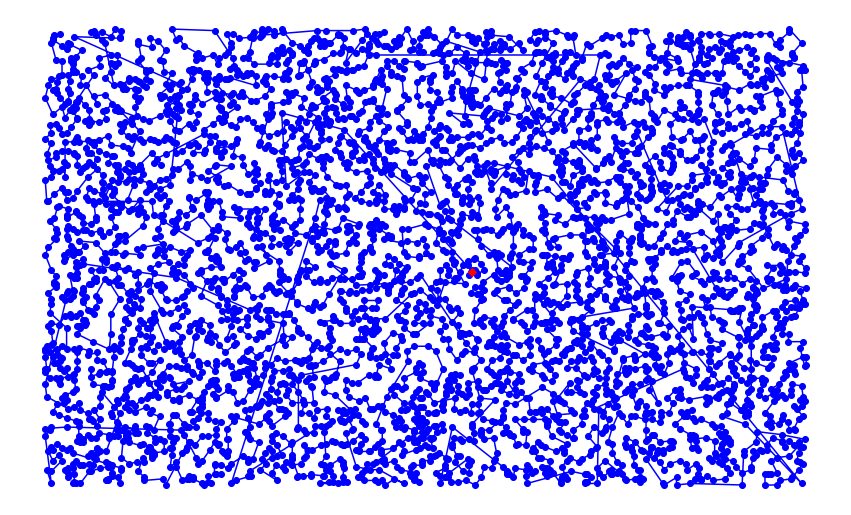

In [28]:
tsp(greedy_algorithm, generate_cities(5000))

# 페이지 랭크 알고리듬 
## 웹 페이지 순서 매기는 알고리듬 

In [4]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 

In [72]:
myweb = nx.DiGraph() 
mypages = range(1,6) # 1~5번 페이지 

# 페이지 간 연결상태 
connections = [(1,3), (2,1), (2,3), (3,1), (3,2), (3,4), (4,5), (5,1), (5,1), (5,4)]
myweb.add_nodes_from(mypages) # 그래프에 노드 5개 추가 
myweb.add_edges_from(connections) # 각 노드 사이 간선 추가 

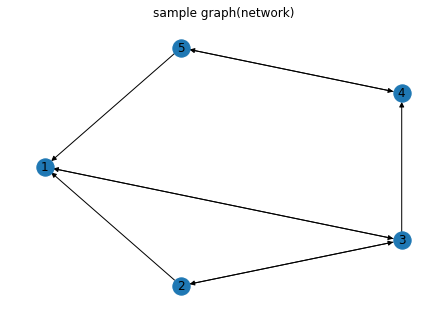

In [73]:
pos = nx.shell_layout(myweb)
nx.draw(myweb, pos, arrows=True, with_labels= True)
plt.title('sample graph(network)')
plt.show()

In [75]:
m = nx.to_numpy_matrix(myweb); print(m)
print()
print(np.asarray(np.sum(m, axis=1)))

x = np.squeeze(np.asarray(np.sum(m, axis=1))) # 벡터 표현방식 5차원 -> 1차원으로 변경; 벡터 표현방식 변경

p = np.array([1/count if count > 0 else 0 for count in x]);p

[[0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0.]]

[[1.]
 [2.]
 [3.]
 [1.]
 [2.]]


array([1.        , 0.5       , 0.33333333, 1.        , 0.5       ])

In [76]:
np.ones(len(myweb))/float(5)

array([0.2, 0.2, 0.2, 0.2, 0.2])

# 페이지랭크 알고리즘 
# 근간 아이디어: "다른 페이지로부터 링크 많이 받는 페이지일 수록 중요한 페이지다"

$\Rightarrow$ 입력: 페이지 연결 나타낸 그래프(인접행렬). / 출력: 각 페이지 가중치. 

여기서는 각 페이지 가중치 계산 및 출력까지 안 가고, 인접행렬 이용해서 전이행렬 계산(출력) 하는 것 까지만 알고리즘 구현했다. 

In [79]:
def pagerank_algorithm(agraph) :
    m = nx.to_numpy_matrix(agraph)# 그래프를 인접행렬로 변환

    sum = np.squeeze(np.asarray(np.sum(m, axis=1)))
    prob_sum = np.array([1.0/x if x > 0 else 0 for x in sum])

    G = np.asarray(np.multiply(m.T, prob_sum))
    p = np.ones(len(agraph))/len(agraph)

    return G,p

In [80]:
pagerank_algorithm(myweb)

(array([[0.        , 0.5       , 0.33333333, 0.        , 0.5       ],
        [0.        , 0.        , 0.33333333, 0.        , 0.        ],
        [1.        , 0.5       , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.33333333, 0.        , 0.5       ],
        [0.        , 0.        , 0.        , 1.        , 0.        ]]),
 array([0.2, 0.2, 0.2, 0.2, 0.2]))

# 2022-07-25

## 선형 계획법 

### 최적화 알고리듬 

In [103]:
import pulp 

# 문제 정의
model = pulp.LpProblem('Profit_maximizing_problem', pulp.LpMaximize)

# 문제에서 쓸 변수 정의 
x = pulp.LpVariable('x', lowBound = 0, cat='Integer')
y = pulp.LpVariable('y', lowBound = 0, cat='Integer')

# 목적함수 정의 
model += 5000*x + 2500*y 

# 부등식 제약조건 정의 
model += 3*x + 2*y <= 20 
model += 4*x + 3*y <= 30 
model += 4*x + 3*y <= 44

# 성능함수 최적해 계산 
model.solve() # 1 = True 

1

In [108]:
print(pulp.LpStatus[model.status]) # 최적값 찾았다. 

# x, y 최적해 출력 
print(x.varValue);print(y.varValue) # x = 6, y = 1 최적해. 

# 최적해 에서 목적함수 최대화된 값(maximized value)
print(pulp.value(model.objective)) 

Optimal
6.0
1.0
32500.0


# 그래프 알고리듬 

## 그래프에 정점과 간선 생성하기 

In [110]:
# 빈 그래프 생성 
import networkx as nx 

g = nx.Graph()

In [111]:
# 정점 추가 
g.add_node('mike')

In [112]:
# 정점 여러 개 한번에 추가 
g.add_nodes_from(['amine', 'wasim', 'nick'])

In [113]:
# mike 정점과 amine 정점 사이 간선(관계) 추가
g.add_edge('mike', 'amine')

In [114]:
# 그래프 정점 목록 
list(g.nodes)

['mike', 'amine', 'wasim', 'nick']

In [115]:
# 그래프 간선 목록 
list(g.edges)

[('mike', 'amine')]

In [116]:
# 아직 추가 안 된 정점에 대해 간선 생성하기 --> 결과로 imran 정점도 같이 생성된다. 
g.add_edge('amine', 'imran')

In [117]:
list(g.edges)

[('mike', 'amine'), ('amine', 'imran')]

In [118]:
list(g.nodes)

['mike', 'amine', 'wasim', 'nick', 'imran']

## 정점 별 중심성 지표 계산 

#### = 정점 별 중요도 계산 

In [133]:
# 예시 네트워크 생성 
import networkx as nx 
import matplotlib.pyplot as plt 
vertexes = range(1,10) # 정점 10개 
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)] # 간선
g = nx.Graph() # 빈 그래프 생성 

In [134]:
# 정점 10개 빈 그래프에 추가 
g.add_nodes_from(vertexes)

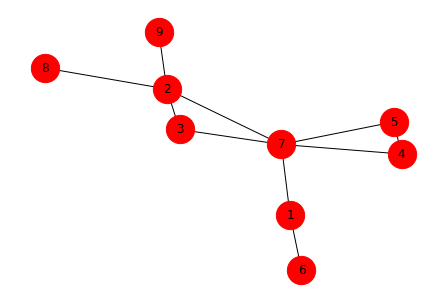

In [149]:
# 간선 빈 그래프에 추가 
g.add_edges_from(edges) 
nx.draw(g, with_labels=True, node_color='r', node_size=800)

In [150]:
# 각 정점에 대한 중심성 지표 계산(정점 별 중요도 계산)

# 1. 도수 중심성
nx.degree_centrality(g)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

<BarContainer object of 9 artists>

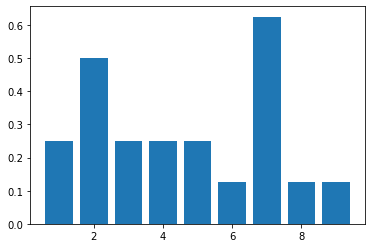

In [151]:
plt.bar(nx.degree_centrality(g).keys(), nx.degree_centrality(g).values())

{1: 0.25, 2: 0.46428571428571425, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.7142857142857142, 8: 0.0, 9: 0.0}


<BarContainer object of 9 artists>

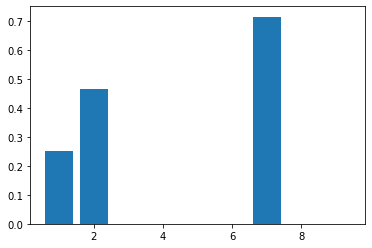

In [156]:
# 2. 매개 중심성 
print(nx.betweenness_centrality(g))
plt.bar(nx.betweenness_centrality(g).keys(), nx.betweenness_centrality(g).values())

{1: 0.5, 2: 0.6153846153846154, 3: 0.5333333333333333, 4: 0.47058823529411764, 5: 0.47058823529411764, 6: 0.34782608695652173, 7: 0.7272727272727273, 8: 0.4, 9: 0.4}


<BarContainer object of 9 artists>

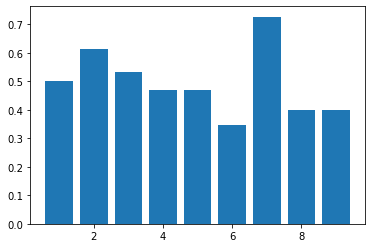

In [157]:
# 3. 근접중심성 
print(nx.closeness_centrality(g)) 
plt.bar(nx.closeness_centrality(g).keys(), nx.closeness_centrality(g).values())

[(1, 0.24), (2, 0.45), (3, 0.36), (4, 0.32), (5, 0.32), (6, 0.08), (7, 0.59), (8, 0.16), (9, 0.16)]


<BarContainer object of 9 artists>

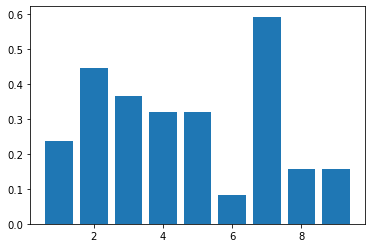

In [160]:
# 고유벡터 중심성 
centrality = nx.eigenvector_centrality(g)
print(sorted([(v, round(c, 2)) for v, c in centrality.items()]))

plt.bar(centrality.keys(), centrality.values())